# Data Exploration


In [ ]:
# loading necessary libraries
import sys
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.simplefilter("ignore") # to ignore the warning
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Reading the data from Google Drive After making connection. To understand the data, its data types and column names. The given dataset has 8 columns. 'par_id' , 'lexicon_count', and 'difficult_words' are numerical columns.

**Important Note:** The dataset named as 'dataset_cw' for clear coding purposes.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/dataset_cw.csv')
print('Dataset Columns:' , data.columns)
print('--'*30)
print('Data a: ')
print(data.dtypes)
# data.describe()

Dataset Columns: Index(['par_id', 'paragraph', 'has_entity', 'lexicon_count', 'difficult_words',
       'last_editor_gender', 'category', 'text_clarity'],
      dtype='object')
------------------------------------------------------------
Data a: 
par_id                  int64
paragraph              object
has_entity             object
lexicon_count           int64
difficult_words       float64
last_editor_gender     object
category               object
text_clarity           object
dtype: object


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9347 entries, 0 to 9346
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   par_id              9347 non-null   int64  
 1   paragraph           9347 non-null   object 
 2   has_entity          9347 non-null   object 
 3   lexicon_count       9347 non-null   int64  
 4   difficult_words     9329 non-null   float64
 5   last_editor_gender  9347 non-null   object 
 6   category            9286 non-null   object 
 7   text_clarity        9 non-null      object 
dtypes: float64(1), int64(2), object(5)
memory usage: 584.3+ KB


## Missing Values
Checking the missing value before proceed the creation of the algorithm is necessary.

'difficult_words' has 18 missing values I have decided to drop all the rows which have missing values.

In [ ]:
print(data.isna().sum())
print('---'*30)
data = data.dropna(subset=['difficult_words'])

print(data.isna().sum())

par_id                   0
paragraph                0
has_entity               0
lexicon_count            0
difficult_words         18
last_editor_gender       0
category                61
text_clarity          9338
dtype: int64
------------------------------------------------------------------------------------------
par_id                   0
paragraph                0
has_entity               0
lexicon_count            0
difficult_words          0
last_editor_gender       0
category                61
text_clarity          9320
dtype: int64


## Duplicates

In [ ]:
duplicated_rows = data.duplicated()

print(duplicated_rows.sum())
print('--'*20)
data.drop_duplicates(inplace=True) #dropping duplicates


print(data.duplicated().sum())
print('--'*20)

215
----------------------------------------
0
----------------------------------------


<ipython-input-10-2e19b1b71fc7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True) #dropping duplicates


In [ ]:
# distribution of the category
print(data['category'].value_counts())
data['category'].isna().value_counts()
print('---'*30)
# pd.DataFrame(data['category'].value_counts()).plot(kind='bar', figsize=(10,10))


biographies                             2881
philosophy                              2506
programming                             1935
artificial intelligence                 1522
movies about artificial intelligence     162
Philosophy                                13
Biographies                               13
Programming                               10
Artificial intelligence                   10
Movies about artificial intelligence       1
Name: category, dtype: int64
------------------------------------------------------------------------------------------


As we can notice that there is some confusion because of some of the values have upper case. To get rid of this problem we can make all values lower cases.

In [ ]:
data['category'] = data['category'].str.lower()

print(data['category'].value_counts())

biographies                             2894
philosophy                              2519
programming                             1945
artificial intelligence                 1532
movies about artificial intelligence     163
Name: category, dtype: int64


As we can see values 'data missing' in 'has_entity' column I guess the best solution to drop all the rows that has 'data missing' values. And deleting underscore would be good solution to make the values more simple.

In [ ]:
print(data['has_entity'].value_counts())
print('--'*30)
data = data[data['has_entity'] != 'data missing']

data['has_entity'] = data['has_entity'].str.replace('_', '')
print(data['has_entity'].value_counts())

ORG_YES_PRODUCT_NO_PERSON_YES_     2987
ORG_NO_PRODUCT_NO_PERSON_NO_       2788
ORG_YES_PRODUCT_NO_PERSON_NO_      1445
ORG_NO_PRODUCT_NO_PERSON_YES_      1348
ORG_YES_PRODUCT_YES_PERSON_YES_     292
ORG_YES_PRODUCT_YES_PERSON_NO_      124
ORG_NO_PRODUCT_YES_PERSON_YES_       64
ORG_NO_PRODUCT_YES_PERSON_NO_        42
data missing                         24
Name: has_entity, dtype: int64
------------------------------------------------------------
ORGYESPRODUCTNOPERSONYES     2987
ORGNOPRODUCTNOPERSONNO       2788
ORGYESPRODUCTNOPERSONNO      1445
ORGNOPRODUCTNOPERSONYES      1348
ORGYESPRODUCTYESPERSONYES     292
ORGYESPRODUCTYESPERSONNO      124
ORGNOPRODUCTYESPERSONYES       64
ORGNOPRODUCTYESPERSONNO        42
Name: has_entity, dtype: int64


<ipython-input-13-c1bc1f74ee2d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['has_entity'] = data['has_entity'].str.replace('_', '')


## Imputing the missing values for 'category' column

The 61 missing values imputed with most frequent values.

In [ ]:
from sklearn.impute import SimpleImputer

c = ['category']
print(data[c].isna().sum())

print('----'*20)
imptr_cat = SimpleImputer(missing_values= np.nan, strategy= 'most_frequent')
imptr_cat = imptr_cat.fit(data[c])

data[c] = imptr_cat.transform(data[c])

print(data[c].isna().sum())

category    61
dtype: int64
--------------------------------------------------------------------------------
category    0
dtype: int64


# Label Encoding

## 'has_entity' column is needed to be encoded using one hot encode.



In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(
    [
        (
            "onehot_categorical",
            OneHotEncoder(),
            ["has_entity"],
        ),
    ],
    remainder="passthrough",
    verbose_feature_names_out=False
)


temp_dataset = data.copy()


encoded_array= ct.fit_transform(temp_dataset)

encoded_col_names= ct.get_feature_names_out()
print(encoded_col_names)

temp_dataset = pd.DataFrame(encoded_array, columns=encoded_col_names)

print()
print(temp_dataset.head(5))

['has_entity_ORGNOPRODUCTNOPERSONNO' 'has_entity_ORGNOPRODUCTNOPERSONYES'
 'has_entity_ORGNOPRODUCTYESPERSONNO'
 'has_entity_ORGNOPRODUCTYESPERSONYES'
 'has_entity_ORGYESPRODUCTNOPERSONNO'
 'has_entity_ORGYESPRODUCTNOPERSONYES'
 'has_entity_ORGYESPRODUCTYESPERSONNO'
 'has_entity_ORGYESPRODUCTYESPERSONYES' 'par_id' 'paragraph'
 'lexicon_count' 'difficult_words' 'last_editor_gender' 'category'
 'text_clarity']

  has_entity_ORGNOPRODUCTNOPERSONNO has_entity_ORGNOPRODUCTNOPERSONYES  \
0                               0.0                                0.0   
1                               0.0                                0.0   
2                               0.0                                0.0   
3                               0.0                                0.0   
4                               0.0                                0.0   

  has_entity_ORGNOPRODUCTYESPERSONNO has_entity_ORGNOPRODUCTYESPERSONYES  \
0                                0.0                              

## Label Encoder for 'category' column

Important note : For the "category" column that represents the target variable in my classification task, LabelEncoder is appropriate and recommended because machine learning models expect the target variable to be numerical (integers) for classification problems.

In [ ]:
print(temp_dataset['category'].value_counts())

biographies                             2945
philosophy                              2514
programming                             1940
artificial intelligence                 1529
movies about artificial intelligence     162
Name: category, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
lblEncoder = LabelEncoder()
encoded_category = lblEncoder.fit_transform(temp_dataset['category'])
print(encoded_category)

temp_dataset['category'] = encoded_category

label_mapping = {label: category for label, category in enumerate(lblEncoder.classes_)}
print(label_mapping)

[1 0 1 ... 1 4 3]
{0: 'artificial intelligence', 1: 'biographies', 2: 'movies about artificial intelligence', 3: 'philosophy', 4: 'programming'}


In [ ]:
temp_dataset['category']

0       1
1       0
2       1
3       4
4       1
       ..
9085    1
9086    1
9087    1
9088    4
9089    3
Name: category, Length: 9090, dtype: int64

# Text Pre-Processing

In [ ]:
temp_dataset.columns

Index(['has_entity_ORGNOPRODUCTNOPERSONNO',
       'has_entity_ORGNOPRODUCTNOPERSONYES',
       'has_entity_ORGNOPRODUCTYESPERSONNO',
       'has_entity_ORGNOPRODUCTYESPERSONYES',
       'has_entity_ORGYESPRODUCTNOPERSONNO',
       'has_entity_ORGYESPRODUCTNOPERSONYES',
       'has_entity_ORGYESPRODUCTYESPERSONNO',
       'has_entity_ORGYESPRODUCTYESPERSONYES', 'par_id', 'paragraph',
       'lexicon_count', 'difficult_words', 'last_editor_gender', 'category',
       'text_clarity'],
      dtype='object')

In [ ]:
task1_data =pd.DataFrame(temp_dataset, columns=['paragraph','category',
       'has_entity_ORGNOPRODUCTNOPERSONNO',
       'has_entity_ORGNOPRODUCTNOPERSONYES',
       'has_entity_ORGNOPRODUCTYESPERSONNO',
       'has_entity_ORGNOPRODUCTYESPERSONYES',
       'has_entity_ORGYESPRODUCTNOPERSONNO',
       'has_entity_ORGYESPRODUCTNOPERSONYES',
       'has_entity_ORGYESPRODUCTYESPERSONNO',
       'has_entity_ORGYESPRODUCTYESPERSONYES',])

In [ ]:
task1_data.head()

,paragraph,category,has_entity_ORGNOPRODUCTNOPERSONNO,has_entity_ORGNOPRODUCTNOPERSONYES,has_entity_ORGNOPRODUCTYESPERSONNO,has_entity_ORGNOPRODUCTYESPERSONYES,has_entity_ORGYESPRODUCTNOPERSONNO,has_entity_ORGYESPRODUCTNOPERSONYES,has_entity_ORGYESPRODUCTYESPERSONNO,has_entity_ORGYESPRODUCTYESPERSONYES
0,Ramsay was born in Glasgow on 2 October 1852. ...,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,It has been widely estimated for at least the ...,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,He went on to win the Royal Medal of the Royal...,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,The changes have altered many underlying assum...,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,"After these novels were published, Disraeli de...",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:

import spacy
import numpy as np
nlp = spacy.load('en_core_web_lg')



In [ ]:
%%capture

!pip install --upgrade spacy

!pip install clean-text

## Lemmatize

In [ ]:
from cleantext import clean
from time import time
t_start= time()
nlp = spacy.load("en_core_web_lg")
def clean_lemmatize(text):

    cleaned_text = clean(text,
                         fix_unicode=True,               # fix various unicode errors
                         lower=True,                     # change all text to lowercase
                         no_line_breaks=True,            # remove occurrences of the newline character "\n"
                         no_punct=False,                 # do not remove punctuations for now
                         no_urls=True,                   # replace all URLs with nothing
                         no_emails=True,                 # replace all email addresses with nothing
                         no_phone_numbers=True,          # replace all phone numbers with nothing
                         lang="en")                      # set language to English


    doc = nlp(cleaned_text)
    lemmatized_tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and not token.is_space]


    return ' '.join(lemmatized_tokens)


task1_data['clean_lemmatized_text'] = task1_data['paragraph'].apply(clean_lemmatize)

task1_data[['paragraph', 'clean_lemmatized_text']].head()

print(f'Processing the entire  data took {time()-t_start:.2f} seconds')

Processing the entire  data took 253.16 seconds


In [ ]:
t_start= time()

def tokenize_text(text):

    doc = nlp(text)

    tokens = [token.text for token in doc]
    return tokens

task1_data['tokens'] = task1_data['clean_lemmatized_text'].apply(tokenize_text)
print(task1_data[['paragraph', 'tokens']])

print(f'Processing the entire  data took {time()-t_start:.2f} seconds')

                                              paragraph  \
0     Ramsay was born in Glasgow on 2 October 1852. ...   
1     It has been widely estimated for at least the ...   
2     He went on to win the Royal Medal of the Royal...   
3     The changes have altered many underlying assum...   
4     After these novels were published, Disraeli de...   
...                                                 ...   
9085  Sir Joseph Dalton Hooker  was a British botani...   
9086  As successful invasions of India generally cam...   
9087  Hawking was born on 8 January 1942 in Oxford t...   
9088  More complex tasks can be making custom data e...   
9089  Governments, and especially the police and cou...   

                                                 tokens  
0     [ramsay, bear, glasgow, 2, october, 1852, neph...  
1     [widely, estimate, generation, program, resour...  
2     [go, win, royal, medal, royal, society, 1971, ...  
3     [change, alter, underlying, assumption, right,...  
4

In [ ]:
task1_data.drop('paragraph', axis=1, inplace=True) #removing paragraph column

In [ ]:
task1_data['text_length'] = task1_data['clean_lemmatized_text'].apply(lambda x: len(x.split()))

In [ ]:
task1_data['text_length'].head()

0    27
1    97
2    40
3    39
4    97
Name: text_length, dtype: int64

In [ ]:
task1_data.dtypes

category                                 int64
has_entity_ORGNOPRODUCTNOPERSONNO       object
has_entity_ORGNOPRODUCTNOPERSONYES      object
has_entity_ORGNOPRODUCTYESPERSONNO      object
has_entity_ORGNOPRODUCTYESPERSONYES     object
has_entity_ORGYESPRODUCTNOPERSONNO      object
has_entity_ORGYESPRODUCTNOPERSONYES     object
has_entity_ORGYESPRODUCTYESPERSONNO     object
has_entity_ORGYESPRODUCTYESPERSONYES    object
clean_lemmatized_text                   object
tokens                                  object
text_length                              int64
dtype: object

## Data *Splitting*

In [ ]:

from sklearn.model_selection import train_test_split



train_task1, test_task1 = train_test_split(task1_data, test_size=0.2, random_state=42, stratify=task1_data['category'])

train_task1, val_df = train_test_split(train_task1, test_size=0.125, random_state=42, stratify=train_task1['category']) # 0.125 x 0.8 = 0.1

print(f"Training Set Size: {len(train_task1)}")
print(f"Validation Set Size: {len(val_df)}")
print(f"Test Set Size: {len(test_task1)}")

Training Set Size: 6363
Validation Set Size: 909
Test Set Size: 1818


In [ ]:
from time import time as tt
import pandas as pd


def get_spacy_doc_embedding(text):
    return nlp(text).vector

t0 = tt()
train_task1_emb = train_task1['clean_lemmatized_text'].apply(lambda x: pd.Series(get_spacy_doc_embedding(x)))

train_task1_new = train_task1_emb.join(train_task1[['text_length', 'category']])


train_task1_new.columns = train_task1_new.columns.astype(str)

print(f'Time elapsed is {(tt() - t0):.2f} seconds')


Time elapsed is 98.56 seconds


In [ ]:
t0 = tt()

val_df_emb = val_df['clean_lemmatized_text'].apply(lambda x: pd.Series(get_spacy_doc_embedding(x)))

val_df_new = val_df_emb.join(val_df[['category']])
val_df_new.columns = val_df_new.columns.astype(str)

print(f'Time elapsed for processing validation data: {(tt() - t0):.2f} seconds')


Time elapsed for processing validation data: 14.44 seconds


In [ ]:
t0 = tt()


test_task1_emb = test_task1['clean_lemmatized_text'].apply(lambda x: pd.Series(get_spacy_doc_embedding(x)))


test_task1_new = test_task1_emb.join(test_task1[['category']])

test_task1_new.columns = test_task1_new.columns.astype(str)

print(f'Time elapsed for processing validation data: {(tt() - t0):.2f} seconds')


Time elapsed for processing validation data: 31.16 seconds


In [ ]:
train_task1.columns

Index(['category', 'has_entity_ORGNOPRODUCTNOPERSONNO',
       'has_entity_ORGNOPRODUCTNOPERSONYES',
       'has_entity_ORGNOPRODUCTYESPERSONNO',
       'has_entity_ORGNOPRODUCTYESPERSONYES',
       'has_entity_ORGYESPRODUCTNOPERSONNO',
       'has_entity_ORGYESPRODUCTNOPERSONYES',
       'has_entity_ORGYESPRODUCTYESPERSONNO',
       'has_entity_ORGYESPRODUCTYESPERSONYES', 'clean_lemmatized_text',
       'tokens', 'text_length'],
      dtype='object')

In [ ]:
train_task1_new.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '292', '293', '294', '295', '296', '297', '298', '299', 'text_length',
       'category'],
      dtype='object', length=302)

In [ ]:
train_task1.head()

,category,has_entity_ORGNOPRODUCTNOPERSONNO,has_entity_ORGNOPRODUCTNOPERSONYES,has_entity_ORGNOPRODUCTYESPERSONNO,has_entity_ORGNOPRODUCTYESPERSONYES,has_entity_ORGYESPRODUCTNOPERSONNO,has_entity_ORGYESPRODUCTNOPERSONYES,has_entity_ORGYESPRODUCTYESPERSONNO,has_entity_ORGYESPRODUCTYESPERSONYES,clean_lemmatized_text,tokens,text_length
6877,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,exist idea mind reality thing equal great exis...,"[exist, idea, mind, reality, thing, equal, gre...",10
7187,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,spinoza assume quasi mathematical style state ...,"[spinoza, assume, quasi, mathematical, style, ...",13
7649,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,john searle 1980 paper mind brain program prop...,"[john, searle, 1980, paper, mind, brain, progr...",67
8397,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,microcode implement emulator enable computer p...,"[microcode, implement, emulator, enable, compu...",29
4373,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,l1 regularization common make weight vector sp...,"[l1, regularization, common, make, weight, vec...",29


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

X_train_tfidf = tfidf_vectorizer.fit_transform(train_task1['clean_lemmatized_text'])

X_val_tfidf = tfidf_vectorizer.transform(val_df['clean_lemmatized_text'])


In [ ]:
train_task1['category'].value_counts()

1    2061
3    1760
4    1358
0    1070
2     114
Name: category, dtype: int64

In [ ]:

y_train = train_task1['category'].values
y_val = val_df['category'].values
y_test = test_task1['category'].values

## HyperParameters Defining and GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 500, 1000]
}


model = LogisticRegression(random_state=42)
#Grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(X_train_tfidf, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)




Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
75 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

Best Parameters: {'C': 10, 'max_iter': 500, 'penalty': 'l2'}
Best Score: 0.9212632221217646


## Task1 Model Evaluation

In [ ]:
category_names = {0: 'artificial intelligence',
                  1: 'biographies',
                  2: 'movies about artificial intelligence',
                  3: 'philosophy',
                  4: 'programming'}

y_val_category = [category_names[label] for label in y_val]
y_pred_val_category = [category_names[label] for label in y_pred_val_grid]

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
best_model = grid_search.best_estimator_

y_pred_val_grid = best_model.predict(X_val_tfidf)



print("\nAccuracy on Validation Set (Grid Search):", accuracy_score(y_val_category, y_pred_val_category))

print("\nClassification Report on Validation Set (Grid Search):\n", classification_report(y_val_category, y_pred_val_category, target_names=list(category_names.values())))


Accuracy on Validation Set (Grid Search): 0.9108910891089109

Classification Report on Validation Set (Grid Search):
                                       precision    recall  f1-score   support

             artificial intelligence       0.88      0.82      0.85       153
                         biographies       0.91      0.94      0.92       295
movies about artificial intelligence       1.00      0.88      0.93        16
                          philosophy       0.92      0.92      0.92       251
                         programming       0.92      0.93      0.93       194

                            accuracy                           0.91       909
                           macro avg       0.93      0.90      0.91       909
                        weighted avg       0.91      0.91      0.91       909



## Training the model with best hyperparameters

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


best_model = LogisticRegression(C=10, max_iter=500, penalty='l2', random_state=42)


best_model.fit(X_train_tfidf, y_train)

y_pred_val_best = best_model.predict(X_val_tfidf)

print("Accuracy on Validation Set (Best Model):", accuracy_score(y_val, y_pred_val_best))
print("\nClassification Report on Validation Set (Best Model):\n", classification_report(y_val, y_pred_val_best))


Accuracy on Validation Set (Best Model): 0.9108910891089109

Classification Report on Validation Set (Best Model):
               precision    recall  f1-score   support

           0       0.88      0.82      0.85       153
           1       0.91      0.94      0.92       295
           2       1.00      0.88      0.93        16
           3       0.92      0.92      0.92       251
           4       0.92      0.93      0.93       194

    accuracy                           0.91       909
   macro avg       0.93      0.90      0.91       909
weighted avg       0.91      0.91      0.91       909



## Confusion Matrix

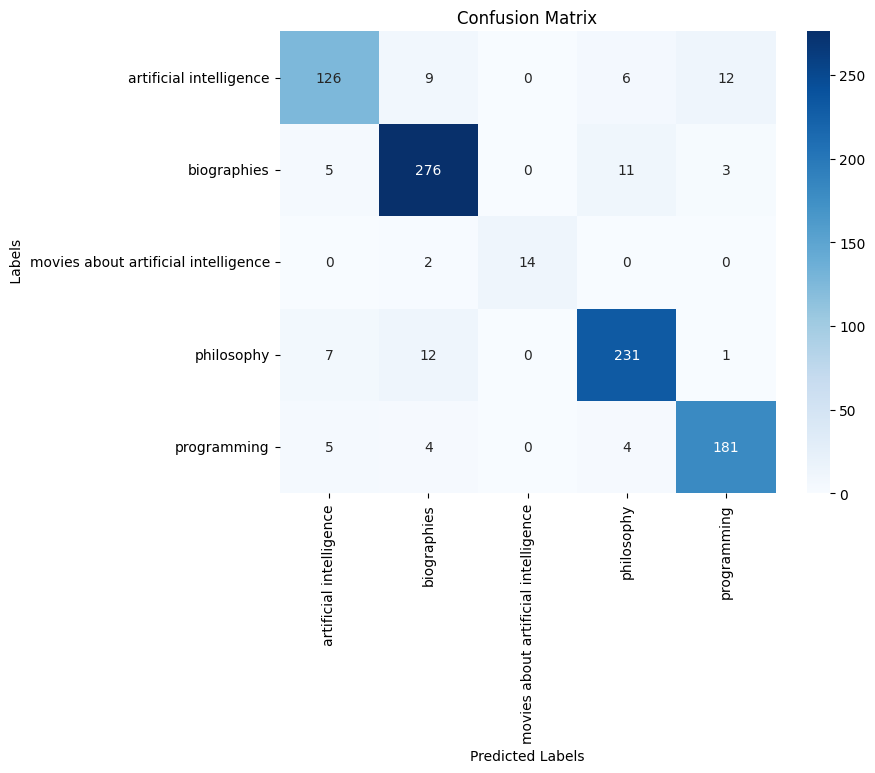

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


conf_matrix = confusion_matrix(y_val_category, y_pred_val_category)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=category_names.values(), yticklabels=category_names.values())
plt.xlabel('Predicted Labels')
plt.ylabel(' Labels')
plt.title('Confusion Matrix')
plt.show()

#######################################

# Task 2

Checking the null values incase any mismatch happens.

In [ ]:
data.isna().sum()

par_id                   0
paragraph                0
has_entity               0
lexicon_count            0
difficult_words          0
last_editor_gender       0
category                 0
text_clarity          8981
dtype: int64

In [ ]:
data.head()

,par_id,paragraph,has_entity,lexicon_count,difficult_words,last_editor_gender,category,text_clarity
0,428209002237,Ramsay was born in Glasgow on 2 October 1852. ...,ORGYESPRODUCTNOPERSONYES,49,12.0,man,biographies,clear_enough
1,564218010072,It has been widely estimated for at least the ...,ORGYESPRODUCTNOPERSONNO,166,47.0,man,artificial intelligence,not_clear_enough
2,291401001672,He went on to win the Royal Medal of the Royal...,ORGYESPRODUCTNOPERSONNO,69,18.0,non-binary,biographies,clear_enough
3,31548004883,The changes have altered many underlying assum...,ORGNOPRODUCTYESPERSONNO,76,27.0,non-binary,programming,clear_enough
4,50634005146,"After these novels were published, Disraeli de...",ORGYESPRODUCTYESPERSONYES,200,47.0,man,biographies,not_clear_enough


## Creating new dataset for second task

In [ ]:
task2_data = data.copy()

In [ ]:
task2_data.head()

,par_id,paragraph,has_entity,lexicon_count,difficult_words,last_editor_gender,category,text_clarity
0,428209002237,Ramsay was born in Glasgow on 2 October 1852. ...,ORGYESPRODUCTNOPERSONYES,49,12.0,man,biographies,clear_enough
1,564218010072,It has been widely estimated for at least the ...,ORGYESPRODUCTNOPERSONNO,166,47.0,man,artificial intelligence,not_clear_enough
2,291401001672,He went on to win the Royal Medal of the Royal...,ORGYESPRODUCTNOPERSONNO,69,18.0,non-binary,biographies,clear_enough
3,31548004883,The changes have altered many underlying assum...,ORGNOPRODUCTYESPERSONNO,76,27.0,non-binary,programming,clear_enough
4,50634005146,"After these novels were published, Disraeli de...",ORGYESPRODUCTYESPERSONYES,200,47.0,man,biographies,not_clear_enough


In [ ]:
task2_data.columns

Index(['par_id', 'paragraph', 'has_entity', 'lexicon_count', 'difficult_words',
       'last_editor_gender', 'category', 'text_clarity'],
      dtype='object')

Some preprocessing for gender column on the way...

Replacing the 'non-binary' and 'prefer_not_to_say' values into a single other category.

In [ ]:
task2_data['last_editor_gender'].value_counts()

man                  6075
woman                2399
non-binary            351
prefer_not_to_say     265
Name: last_editor_gender, dtype: int64

In [ ]:

task2_data['last_editor_gender'] = task2_data['last_editor_gender'].replace({
    'non-binary': 'other', 'prefer_not_to_say': 'other'})

print(task2_data['last_editor_gender'].value_counts())

man      6075
woman    2399
other     616
Name: last_editor_gender, dtype: int64


In [ ]:
type(task2_data)

pandas.core.frame.DataFrame

In [ ]:
task2_data['text_clarity'].isna().sum()

8981

## Label Encoding for Categorical Column

In [ ]:
lblEncoder = LabelEncoder()

lblEncoder = lblEncoder.fit(task2_data['has_entity']) # encoding has entity column
task2_data['has_entity'] = lblEncoder.transform(task2_data['has_entity'])

lblEncoder = lblEncoder.fit(task2_data['category']) # encoding has entity column
task2_data['category'] = lblEncoder.transform(task2_data['category'])

lblEncoder = lblEncoder.fit(task2_data['last_editor_gender']) # encodinglast_editor_gender column
task2_data['last_editor_gender'] = lblEncoder.transform(task2_data['last_editor_gender'])





In [ ]:
task2_data.columns

Index(['par_id', 'paragraph', 'has_entity', 'lexicon_count', 'difficult_words',
       'last_editor_gender', 'category', 'text_clarity'],
      dtype='object')

## Lemmatization

In [ ]:
t0 = tt()

task2_data['clean_lemmatized_text'] = task2_data['paragraph'].apply(clean_lemmatize)

task2_data[['paragraph', 'clean_lemmatized_text']].head()

print(f'Time elapsed for processing data: {(tt() - t0):.2f} seconds')

Time elapsed for processing data: 220.96 seconds


## Setting conditions for creating subset

Mean values of 'difficult_words' and 'lexicon_count' columns assigned to two different variables.

In [ ]:
mean_diff_words = task2_data['difficult_words'].mean()
mean_lex_count = task2_data['lexicon_count'].mean()

print("Mean of the difficult words", mean_diff_words)
print("Mean of the lexicon count ", mean_lex_count)

Mean of the difficult words 21.532893289328932
Mean of the lexicon count  82.02684268426843


In [ ]:
task2_sample = task2_data.sample(n=100)
print(task2_sample.shape)

(100, 9)


As I will use tfidf vectorizer for this task, vectorizing the clean_text would be much better and appropriate for this task. Therefore, i will not take tokens column in my dataset

In [ ]:
sub_col = ['has_entity', 'lexicon_count', 'difficult_words',
       'last_editor_gender', 'category','text_clarity',
       'clean_lemmatized_text' ]

In [ ]:
task2_sample.columns

Index(['par_id', 'paragraph', 'has_entity', 'lexicon_count', 'difficult_words',
       'last_editor_gender', 'category', 'text_clarity',
       'clean_lemmatized_text'],
      dtype='object')

In [ ]:
task2_sample = task2_sample[sub_col]
print(task2_sample.columns)

Index(['has_entity', 'lexicon_count', 'difficult_words', 'last_editor_gender',
       'category', 'text_clarity', 'clean_lemmatized_text'],
      dtype='object')


In [ ]:
print(task2_sample['category'].isna().sum())

0


Here we are applying the conditions to our dataset.

In [ ]:
task2_sample['clarity'] = task2_sample.apply(lambda x: 'not_clear_enough' if x['difficult_words'] > mean_diff_words and x['lexicon_count'] > mean_lex_count else 'clear_enough', axis=1)

In [ ]:
task2_sample['clarity'].head() # checking if application is correct.


7888    not_clear_enough
5578        clear_enough
4208        clear_enough
8177        clear_enough
6709        clear_enough
Name: clarity, dtype: object

In [ ]:
data['text_clarity'] = data['text_clarity'].combine_first(task2_sample['clarity'])

In [ ]:

file_path = "merged_dataset.xlsx"
data.to_excel(file_path, index=False)


In [ ]:

lblEncoder = lblEncoder.fit(task2_sample['clarity']) # encoding clarity  column
task2_sample['clarity'] = lblEncoder.transform(task2_sample['clarity'])

In [ ]:
task2_sample['clarity'].tail()


5467    0
3552    1
6094    1
244     1
1266    0
Name: clarity, dtype: int64

In [ ]:
task2_sample = task2_sample.drop(columns=['text_clarity'])

In [ ]:
import string
EXTRA_PUNCT = string.punctuation


import spacy
nlp = spacy.load('en_core_web_lg')



def get_spacy_doc_embedding(text_):
  ''' Given a text document, return the Spacy document embedding. '''
  doc_ = nlp(text_)
  return doc_.vector

def compute_avg_lemma_embedding(text_):
  """
  This function takes a Spacy doc and returns the average word embedding,
  ONLY for selected tokens.
  """

  doc_ = nlp(text_)

  avg_embedding = np.zeros_like(doc_.vector)
  token_counter = 0
  for token in doc_:
    if (token.is_stop or token.is_punct or token.is_digit or (token.lemma_ in EXTRA_PUNCT)):
      continue
    avg_embedding += token.vector
    token_counter+=1
  if token_counter>0:
    avg_embedding = avg_embedding/token_counter
  return avg_embedding

In [ ]:
task2_sample.columns

Index(['has_entity', 'lexicon_count', 'difficult_words', 'last_editor_gender',
       'category', 'clean_lemmatized_text', 'clarity'],
      dtype='object')

In [ ]:
task2_sample.head()

,has_entity,lexicon_count,difficult_words,last_editor_gender,category,clean_lemmatized_text,clarity
7888,4,147,35.0,0,1,12 small dissect kit dissect bumblebee get tro...,1
5578,0,16,3.0,2,4,enumerate perfect number check number perfect,0
4208,4,106,16.0,0,3,fact pain accessible consult order establish f...,0
8177,4,35,10.0,0,4,posix file reference file system object plain ...,0
6709,0,27,12.0,2,1,concept sustainable retreat emphasise pattern ...,0


In [ ]:
X = task2_sample.drop(columns=['clarity'])
y = task2_sample['clarity']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42, stratify=y_train)


In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (70, 6)
y_train shape: (70,)
X_val shape: (10, 6)
y_val shape: (10,)
X_test shape: (20, 6)
y_test shape: (20,)


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD

ct = ColumnTransformer(
    transformers= [

        (
            "scaling",
            StandardScaler(),
            ["clarity"],
        )
    ],
    remainder="passthrough",
    verbose_feature_names_out=False
)
clf_ = Pipeline(
        steps =[('scaling', ct),
              ('clf', MLPClassifier()),
      ]
    )

hparameters = {'clf__hidden_layer_sizes': ((20,20)),
              'clf__alpha': (0.0001, 0.001),
             }


## Model Task2 First Try

In [ ]:

preprocessor = ColumnTransformer(
    transformers=[
        ('text_vect', TfidfVectorizer(), 'clean_lemmatized_text')

    ],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', MLPClassifier(random_state=42))
])

parameters = {

    'classifier__alpha': [0.0001, 0.001],
    'classifier__hidden_layer_sizes': [(20, 20)]
}

clf_search = GridSearchCV(pipeline, parameters, cv=5, scoring='accuracy', return_train_score=True)

clf_search.fit(X_train, y_train)

print("Best Parameters Found:")
print(clf_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Best Parameters Found:
{'classifier__alpha': 0.0001, 'classifier__hidden_layer_sizes': (20, 20)}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
y_test_pred = clf_search.predict(X_test)


test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)
print("Classification Report on Test Set:")
print(classification_report(y_test, y_test_pred))

Test Accuracy: 0.7
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        14
           1       0.50      0.67      0.57         6

    accuracy                           0.70        20
   macro avg       0.67      0.69      0.67        20
weighted avg       0.73      0.70      0.71        20



In [ ]:
y_val_pred = clf_search.predict(X_val)
validation_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", validation_accuracy)

print("Classification Report on Validation Set:")
print(classification_report(y_val, y_val_pred))

Validation Accuracy: 0.9
Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.67      0.80         3

    accuracy                           0.90        10
   macro avg       0.94      0.83      0.87        10
weighted avg       0.91      0.90      0.89        10



########################################################################

## Task2 Second Try

In [ ]:
task2_data = temp_dataset.copy()
task2_data.head()

,has_entity_ORGNOPRODUCTNOPERSONNO,has_entity_ORGNOPRODUCTNOPERSONYES,has_entity_ORGNOPRODUCTYESPERSONNO,has_entity_ORGNOPRODUCTYESPERSONYES,has_entity_ORGYESPRODUCTNOPERSONNO,has_entity_ORGYESPRODUCTNOPERSONYES,has_entity_ORGYESPRODUCTYESPERSONNO,has_entity_ORGYESPRODUCTYESPERSONYES,par_id,paragraph,lexicon_count,difficult_words,last_editor_gender,category,text_clarity
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,428209002237,Ramsay was born in Glasgow on 2 October 1852. ...,49,12.0,man,1,clear_enough
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,564218010072,It has been widely estimated for at least the ...,166,47.0,man,0,not_clear_enough
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,291401001672,He went on to win the Royal Medal of the Royal...,69,18.0,non-binary,1,clear_enough
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,31548004883,The changes have altered many underlying assum...,76,27.0,non-binary,4,clear_enough
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50634005146,"After these novels were published, Disraeli de...",200,47.0,man,1,not_clear_enough


In [ ]:
lblEncoder = LabelEncoder()

lblEncoder = lblEncoder.fit(task2_data['category']) # encoding has entity column
task2_data['category'] = lblEncoder.transform(task2_data['category'])

lblEncoder = lblEncoder.fit(task2_data['last_editor_gender']) # encodinglast_editor_gender column
task2_data['last_editor_gender'] = lblEncoder.transform(task2_data['last_editor_gender'])





## Text Cleaning for Task2

Before splitting the dataset I preferred to clean text rather than using previous task's clean text.


In [ ]:
t0 = tt()

task2_data['clean_lemmatized_text'] = task2_data['paragraph'].apply(clean_lemmatize)


task2_data[['paragraph', 'clean_lemmatized_text']].head()

print(f'Time elapsed for processing data: {(tt() - t0):.2f} seconds')

Time elapsed for processing data: 230.26 seconds


In [ ]:

task2_data.drop(['paragraph', 'par_id'], axis=1, inplace=True)
task2_data.head()

,has_entity_ORGNOPRODUCTNOPERSONNO,has_entity_ORGNOPRODUCTNOPERSONYES,has_entity_ORGNOPRODUCTYESPERSONNO,has_entity_ORGNOPRODUCTYESPERSONYES,has_entity_ORGYESPRODUCTNOPERSONNO,has_entity_ORGYESPRODUCTNOPERSONYES,has_entity_ORGYESPRODUCTYESPERSONNO,has_entity_ORGYESPRODUCTYESPERSONYES,lexicon_count,difficult_words,last_editor_gender,category,text_clarity,clean_lemmatized_text
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,12.0,0,1,clear_enough,ramsay bear glasgow 2 october 1852 nephew geol...
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,166,47.0,0,0,not_clear_enough,widely estimate generation program resource de...
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,69,18.0,1,1,clear_enough,go win royal medal royal society 1971 copley m...
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,76,27.0,1,4,clear_enough,change alter underlying assumption right thing...
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,200,47.0,0,1,not_clear_enough,novel publish disraeli declare write turn atte...


In [ ]:
mean_diff_words = task2_data['difficult_words'].mean()
mean_lex_count = task2_data['lexicon_count'].mean()

print("Mean of the difficult words", mean_diff_words)
print("Mean of the lexicon count ", mean_lex_count)

Mean of the difficult words 21.532893289328932
Mean of the lexicon count  82.02684268426843


In [ ]:
task2_sample = task2_data.sample(n=100)
print(task2_sample.shape)

(100, 14)


In [ ]:
task2_sample['clarity'] = task2_sample.apply(lambda x: 'not_clear_enough' if x['difficult_words'] > mean_diff_words and x['lexicon_count'] > mean_lex_count else 'clear_enough', axis=1)

In [ ]:

lblEncoder = lblEncoder.fit(task2_sample['clarity']) # encoding clarity  column
task2_sample['clarity'] = lblEncoder.transform(task2_sample['clarity'])

In [ ]:
task2_sample.columns


Index(['has_entity_ORGNOPRODUCTNOPERSONNO',
       'has_entity_ORGNOPRODUCTNOPERSONYES',
       'has_entity_ORGNOPRODUCTYESPERSONNO',
       'has_entity_ORGNOPRODUCTYESPERSONYES',
       'has_entity_ORGYESPRODUCTNOPERSONNO',
       'has_entity_ORGYESPRODUCTNOPERSONYES',
       'has_entity_ORGYESPRODUCTYESPERSONNO',
       'has_entity_ORGYESPRODUCTYESPERSONYES', 'lexicon_count',
       'difficult_words', 'last_editor_gender', 'category', 'text_clarity',
       'clean_lemmatized_text', 'clarity'],
      dtype='object')

In [ ]:
task2_sample['clarity'].tail()

4743    0
7802    0
8029    1
7320    0
8689    0
Name: clarity, dtype: int64

In [ ]:
task2_sample.drop(['text_clarity'], axis=1, inplace=True)

In [ ]:
task2_data.head()

,has_entity_ORGNOPRODUCTNOPERSONNO,has_entity_ORGNOPRODUCTNOPERSONYES,has_entity_ORGNOPRODUCTYESPERSONNO,has_entity_ORGNOPRODUCTYESPERSONYES,has_entity_ORGYESPRODUCTNOPERSONNO,has_entity_ORGYESPRODUCTNOPERSONYES,has_entity_ORGYESPRODUCTYESPERSONNO,has_entity_ORGYESPRODUCTYESPERSONYES,lexicon_count,difficult_words,last_editor_gender,category,text_clarity,clean_lemmatized_text
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,12.0,0,1,clear_enough,ramsay bear glasgow 2 october 1852 nephew geol...
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,166,47.0,0,0,not_clear_enough,widely estimate generation program resource de...
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,69,18.0,1,1,clear_enough,go win royal medal royal society 1971 copley m...
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,76,27.0,1,4,clear_enough,change alter underlying assumption right thing...
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,200,47.0,0,1,not_clear_enough,novel publish disraeli declare write turn atte...


## Data Splitting

In [ ]:
X = task2_sample.drop(['clarity'], axis=1)
y = task2_sample['clarity']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42, stratify=y_train) # 0.125 x 0.8 = 0.1
print(f"Training Set Size: {len(X_train)}")
print(f"Validation Set Size: {len(X_val)}")
print(f"Test Set Size: {len(X_test)}")

Training Set Size: 70
Validation Set Size: 10
Test Set Size: 20


## Tf-idf

In [ ]:
task2_sample['clarity'].value_counts()

0    64
1    36
Name: clarity, dtype: int64

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')


X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['clean_lemmatized_text'])


X_val_tfidf = tfidf_vectorizer.transform(X_val['clean_lemmatized_text'])
X_test_tfidf = tfidf_vectorizer.transform(X_test['clean_lemmatized_text'])


In [ ]:
print(X_train_tfidf)


  (0, 951)	0.09412265206359201
  (0, 1229)	0.08577093344611103
  (0, 1324)	0.07984529478481812
  (0, 269)	0.09412265206359201
  (0, 713)	0.07984529478481812
  (0, 578)	0.06556793750604425
  (0, 922)	0.08577093344611103
  (0, 447)	0.09412265206359201
  (0, 479)	0.08577093344611103
  (0, 180)	0.09412265206359201
  (0, 1647)	0.05261993645978139
  (0, 1443)	0.08577093344611103
  (0, 1396)	0.09412265206359201
  (0, 981)	0.07984529478481812
  (0, 1086)	0.08577093344611103
  (0, 804)	0.09412265206359201
  (0, 1625)	0.06831840011182508
  (0, 469)	0.09412265206359201
  (0, 271)	0.09412265206359201
  (0, 177)	0.09412265206359201
  (0, 554)	0.09412265206359201
  (0, 689)	0.09412265206359201
  (0, 735)	0.08577093344611103
  (0, 476)	0.08577093344611103
  (0, 167)	0.07984529478481812
  :	:
  (69, 76)	0.07535764928288381
  (69, 594)	0.07535764928288381
  (69, 1406)	0.06281367850779307
  (69, 188)	0.07535764928288381
  (69, 1219)	0.07015143102136326
  (69, 1171)	0.07015143102136326
  (69, 863)	0.1322

In [ ]:
scaler = StandardScaler()
scaler.set_output(transform="pandas")

X_train_scaled = scaler.fit_transform(X_train.drop(columns=['clean_lemmatized_text']))

X_val_scaled = scaler.transform(X_val.drop(columns=['clean_lemmatized_text']))
X_test_scaled = scaler.transform(X_test.drop(columns=['clean_lemmatized_text']))

In [ ]:
print(X_train_scaled.isna().sum())

has_entity_ORGNOPRODUCTNOPERSONNO       0
has_entity_ORGNOPRODUCTNOPERSONYES      0
has_entity_ORGNOPRODUCTYESPERSONNO      0
has_entity_ORGNOPRODUCTYESPERSONYES     0
has_entity_ORGYESPRODUCTNOPERSONNO      0
has_entity_ORGYESPRODUCTNOPERSONYES     0
has_entity_ORGYESPRODUCTYESPERSONNO     0
has_entity_ORGYESPRODUCTYESPERSONYES    0
lexicon_count                           0
difficult_words                         0
last_editor_gender                      0
category                                0
dtype: int64


In [ ]:
from sklearn.decomposition import PCA, TruncatedSVD
pca = PCA(n_components = .90)
pca = pca.fit(X_train_scaled)

cumulative_explained_var_ratio = np.cumsum(pca.explained_variance_ratio_)

Cumulative explained variances: {1: 0.268, 2: 0.413, 3: 0.542, 4: 0.661, 5: 0.77, 6: 0.863, 7: 0.934}



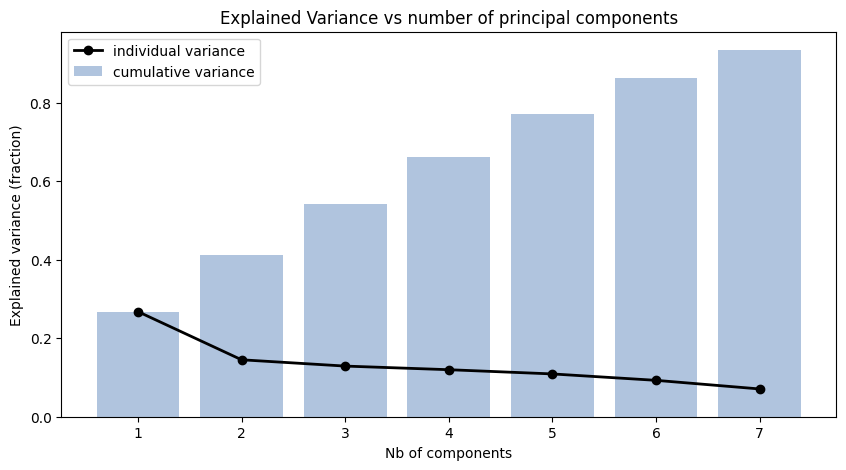

In [ ]:
ind = range(1,len(cumulative_explained_var_ratio)+1)

fig = plt.figure(figsize=(10, 5))
ax1 = plt.subplot(111)

_ = ax1.set_xticks(ind)
_ = ax1.set_xticklabels(ind)
_ = ax1.bar(ind, cumulative_explained_var_ratio, width=0.8, color='lightsteelblue',
            label = 'cumulative variance')
_ = ax1.plot(ind, pca.explained_variance_ratio_, '-o', linewidth= 2, color= 'black',
             label = 'individual variance')

_ = ax1.set_title('Explained Variance vs number of principal components')
_ = ax1.set_xlabel('Nb of components')
_ = ax1.set_ylabel('Explained variance (fraction)')
ax1.legend()

print('Cumulative explained variances: {}'.format(dict(zip(ind, [np.around(t,3) for t in cumulative_explained_var_ratio]))))
print()



The total number of components used is 12
Cumulative variance explained:  [0.26765961 0.41267292 0.54164306 0.66138488 0.77037036 0.86303614
 0.93376093 0.99307573 1.         1.         1.         1.        ]


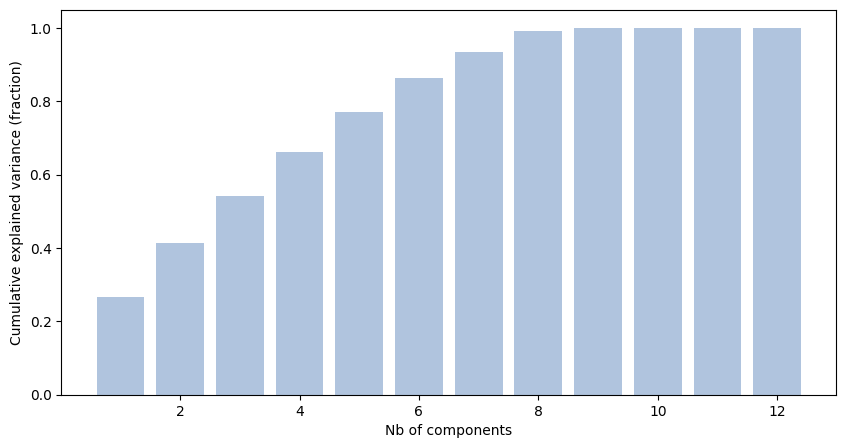

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca_transform = pca.fit_transform(X_train_scaled)

print(f'The total number of components used is {len(pca.explained_variance_ratio_)}')

plt.figure(figsize=(10, 5))
_ = plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), width=0.8, color='lightsteelblue',
            label='cumulative variance')
_ = plt.xlabel('Nb of components')
_ = plt.ylabel('Cumulative explained variance (fraction)')
print('Cumulative variance explained: ', np.cumsum(pca.explained_variance_ratio_))


Data dimensionality with 2 components is 2
Data dimensionality with 3 components is 3
Data dimensionality with 4 components is 4
Data dimensionality with 5 components is 5
Data dimensionality with 6 components is 6
Data dimensionality with 7 components is 7
Data dimensionality with 8 components is 8
Data dimensionality with 9 components is 9
Data dimensionality with 10 components is 10
Data dimensionality with 11 components is 11
Data dimensionality with 12 components is 12

 The best number of principal components to use is: 9 

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.86      0.92         7

    accuracy                           0.95        20
   macro avg       0.96      0.93      0.94        20
weighted avg       0.95      0.95      0.95        20





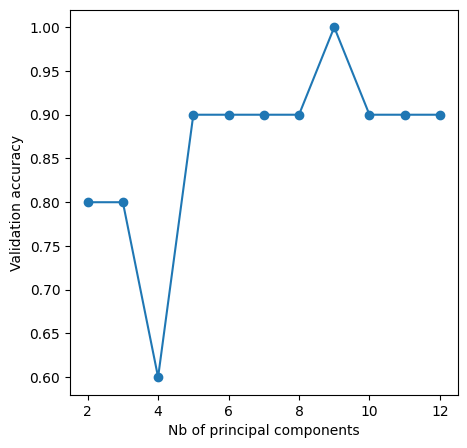

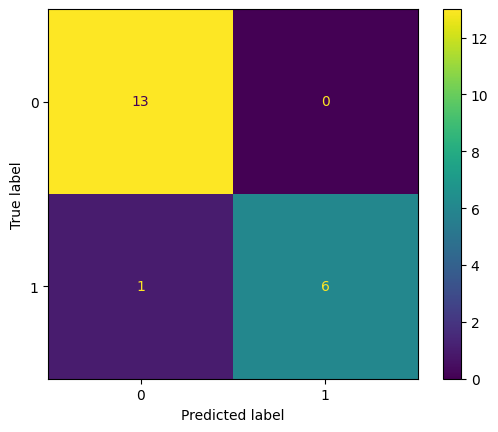

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import ConfusionMatrixDisplay
comp_num_lst = range(2,13)

accuracy_by_component = []

for comp_num in comp_num_lst:
    pca = PCA(n_components=comp_num)
    clf_ = SGDClassifier()

    pca.fit(X_train_scaled)

    pca_data_training = pca.transform(X_train_scaled)
    pca_data_val = pca.transform(X_val_scaled)
    print(f'Data dimensionality with {comp_num} components is {pca_data_training.shape[1]}')

    clf_.fit(pca_data_training, y_train)
    accuracy_by_component.append(clf_.score(pca_data_val, y_val))

plt.figure(figsize=(5,5))
plt.plot(comp_num_lst, accuracy_by_component, '-o')
plt.xlabel('Nb of principal components')
plt.ylabel('Validation accuracy')

best_accuracy_ind = np.argmax(accuracy_by_component)
best_component_nb = comp_num_lst[best_accuracy_ind]
print(f'\n The best number of principal components to use is: {best_component_nb} \n')


best_pca = PCA(n_components=best_component_nb)
best_clf_ = SGDClassifier()

best_pca.fit(X_train_scaled)

pca_data_training = pca.transform(X_train_scaled)
pca_data_test = pca.transform(X_test_scaled)


best_clf_.fit(pca_data_training, y_train)

target_pred = best_clf_.predict(pca_data_test)
print(classification_report(y_test, target_pred))
print()

print()
cm= ConfusionMatrixDisplay.from_estimator(best_clf_, pca_data_test, y_test)



In [ ]:
print("Classification Report for Validation Set:")
print(classification_report(y_val, best_clf_.predict(pca_data_val)))
print("\nClassification Report for Test Set:")
print(classification_report(y_test, target_pred))

Classification Report for Validation Set:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.80      1.00      0.89         4

    accuracy                           0.90        10
   macro avg       0.90      0.92      0.90        10
weighted avg       0.92      0.90      0.90        10


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.86      0.92         7

    accuracy                           0.95        20
   macro avg       0.96      0.93      0.94        20
weighted avg       0.95      0.95      0.95        20



In [ ]:

param_grid = {
    'alpha': [0.0001, 0.001, 0.01],
    'penalty': ['l1', 'l2']
}


clf = SGDClassifier()


grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(pca_data_training, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'alpha': 0.01, 'penalty': 'l1'}
Best Score: 0.9285714285714285


In [ ]:
from sklearn.metrics import accuracy_score

best_clf = SGDClassifier(alpha=0.0001, penalty='l1')

best_clf.fit(pca_data_training, y_train)

y_pred = best_clf.predict(pca_data_val)


print("Classification Report for Validation Set:")
print(classification_report(y_val, best_clf_.predict(pca_data_val)))
print("\nClassification Report for Test Set:")
print(classification_report(y_test, target_pred))

Classification Report for Validation Set:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.80      1.00      0.89         4

    accuracy                           0.90        10
   macro avg       0.90      0.92      0.90        10
weighted avg       0.92      0.90      0.90        10


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.86      0.92         7

    accuracy                           0.95        20
   macro avg       0.96      0.93      0.94        20
weighted avg       0.95      0.95      0.95        20



## Class Weight

In [ ]:
from sklearn.utils.class_weight import compute_class_weight


class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)


best_clf_weighted = SGDClassifier(alpha=0.0001, penalty='l2', class_weight={0: class_weights[0], 1: class_weights[1]})

best_clf_weighted.fit(pca_data_training, y_train)

y_val_pred_weighted = best_clf_weighted.predict(pca_data_val)
y_test_pred_weighted = best_clf_weighted.predict(pca_data_test)

print("Classification Report for Validation Set with Class Weights:")
print(classification_report(y_val, y_val_pred_weighted))

print("\nClassification Report for Test Set with Class Weights:")
print(classification_report(y_test, y_test_pred_weighted))


Classification Report for Validation Set with Class Weights:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.75      0.86         4

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10


Classification Report for Test Set with Class Weights:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.86      0.92         7

    accuracy                           0.95        20
   macro avg       0.96      0.93      0.94        20
weighted avg       0.95      0.95      0.95        20



## Grid Search on SGDClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report


param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'penalty': ['l1', 'l2'],
    'loss': ['hinge', 'log', 'modified_huber'],
    'learning_rate': ['constant', 'optimal', 'adaptive'],
}

sgd_clf = SGDClassifier()

grid_search = GridSearchCV(sgd_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_tfidf, y_train)

best_params_grid = grid_search.best_params_
best_score_grid = grid_search.best_score_

print("Best Parameters (Grid Search):", best_params_grid)
print("Best Score (Grid Search):", best_score_grid)

param_dist = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'penalty': ['l1', 'l2'],
    'loss': ['hinge', 'log', 'modified_huber'],
    'learning_rate': ['constant', 'optimal', 'adaptive'], rate schedule
}


random_search = RandomizedSearchCV(sgd_clf, param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train_tfidf, y_train)


best_params_random = random_search.best_params_
best_score_random = random_search.best_score_
print("Best Parameters (Randomized Search):", best_params_random)
print("Best Score (Randomized Search):", best_score_random)


best_model = random_search.best_estimator_
y_pred_test = best_model.predict(X_test_tfidf)
print("Test Set Classification Report:")
print(classification_report(y_test, y_pred_test))


Best Parameters (Grid Search): {'alpha': 0.001, 'learning_rate': 'optimal', 'loss': 'hinge', 'penalty': 'l2'}
Best Score (Grid Search): 0.6714285714285715
Best Parameters (Randomized Search): {'penalty': 'l1', 'loss': 'log', 'learning_rate': 'optimal', 'alpha': 0.1}
Best Score (Randomized Search): 0.6428571428571429
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        13
           1       0.00      0.00      0.00         7

    accuracy                           0.65        20
   macro avg       0.33      0.50      0.39        20
weighted avg       0.42      0.65      0.51        20



In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

mlp_clf = MLPClassifier(random_state=42)


mlp_clf.fit(X_train_tfidf, y_train)


y_val_pred = mlp_clf.predict(X_val_tfidf)


print("Classification Report for Validation Set:")
print(classification_report(y_val, y_val_pred))


y_test_pred = mlp_clf.predict(X_test_tfidf)


print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_test_pred))


Classification Report for Validation Set:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.50      0.50      0.50         4

    accuracy                           0.60        10
   macro avg       0.58      0.58      0.58        10
weighted avg       0.60      0.60      0.60        10


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.71      0.77      0.74        13
           1       0.50      0.43      0.46         7

    accuracy                           0.65        20
   macro avg       0.61      0.60      0.60        20
weighted avg       0.64      0.65      0.64        20



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# defining the parameters
param_grid = {
    'hidden_layer_sizes': [(30,), (20,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
}


mlp_clf = MLPClassifier(random_state=42)

grid_search = GridSearchCV(mlp_clf, param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_train_tfidf, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_mlp_clf = MLPClassifier(random_state=42, **best_params)


best_mlp_clf.fit(X_train_tfidf, y_train)

y_test_pred_best = best_mlp_clf.predict(X_test_tfidf)

print("\nClassification Report for Test Set with Best Hyperparameters:")
print(classification_report(y_test, y_test_pred_best))



Classification Report for Test Set with Best Hyperparameters:
              precision    recall  f1-score   support

           0       0.63      0.92      0.75        13
           1       0.00      0.00      0.00         7

    accuracy                           0.60        20
   macro avg       0.32      0.46      0.37        20
weighted avg       0.41      0.60      0.49        20



In [ ]:

pca_viz = PCA(n_components=2)
pca_viz_transform = pca_viz.fit_transform(X_train_scaled)

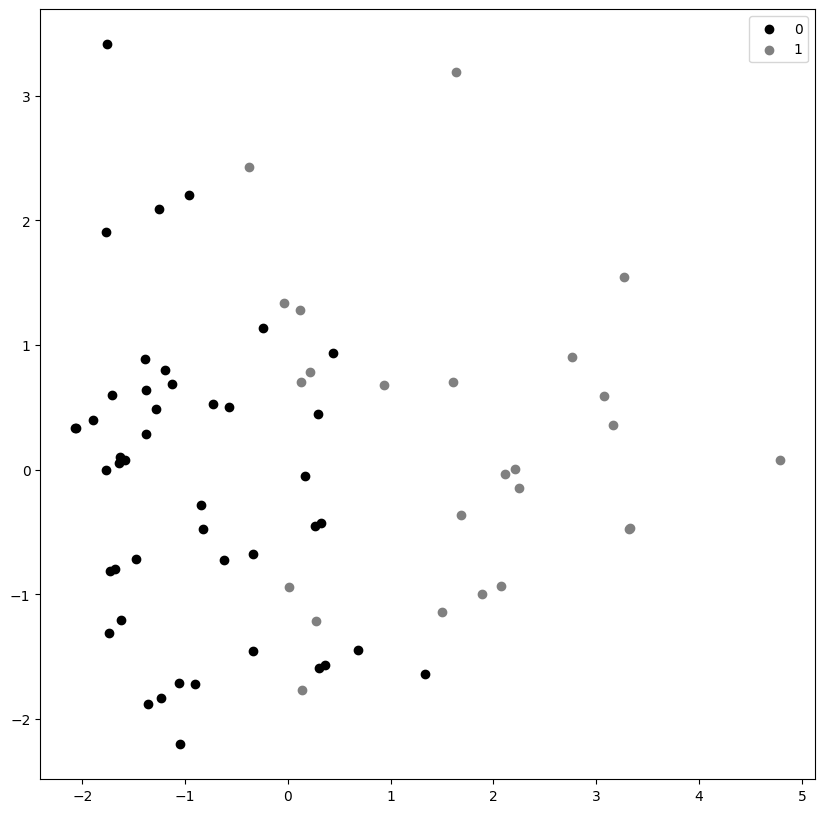

In [ ]:

classes_ = y_train.value_counts().index

colors = ['black', 'grey','lightgrey']

plt.figure(figsize=(10,10))
for target_class,color in zip(classes_, colors):

    plt.scatter(pca_viz_transform[y_train==target_class,0],
                pca_viz_transform[y_train==target_class,1],
                label=target_class,
                color=color)
plt.legend()